<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Semanal Nº2
#### Lucas Douat

## Introducción

En esta práctica se estudian sistemas lineales invariantes en el tiempo (LTI) mediante su representación en diferencias. Se analiza la respuesta al impulso y la salida ante distintas señales de entrada, utilizando dos enfoques de implementación:

- La función `scipy.signal.lfilter`, que aplica directamente la ecuación en diferencias.
- Un algoritmo propio que evalúa condiciones iniciales y reproduce el comportamiento del sistema.

El sistema principal está definido por la siguiente ecuación:

$y[n] = 0.03x[n] + 0.05x[n-1] + 0.03x[n-2] + 1.5y[n-1] - 0.5y[n-2]$

También se estudian dos sistemas adicionales:

- **No recursivo**: $( y[n] = x[n] + 3x[n-10] $
- **Recursivo**: $ y[n] = x[n] + 3y[n-10] $

Se evalúan las salidas ante señales causales como senoidales, moduladas, cuadradas y pulsos, y se calcula la  potencia de cada una. Además, se analiza la importancia de la cantidad de muestras y el uso de **zero-padding** para evitar truncamiento en la respuesta del sistema.

## Analisis y Desarrollo
Respuesta de mi sistema utilizando las señales de la Tarea Semanal 1 y la función `scipy.signal.lfilter`

Frecuencia de muestreo: 100000 Hz
Tiempo de simulación: 0.011 segundos
x1 | Potencia: 4.5317
x2 | Potencia: 5.9479
x3 | Potencia: 1.6741
x4 | Potencia: 3.4498
x5 | Potencia: 43.3493
x6 | Potencia: 18991.8546


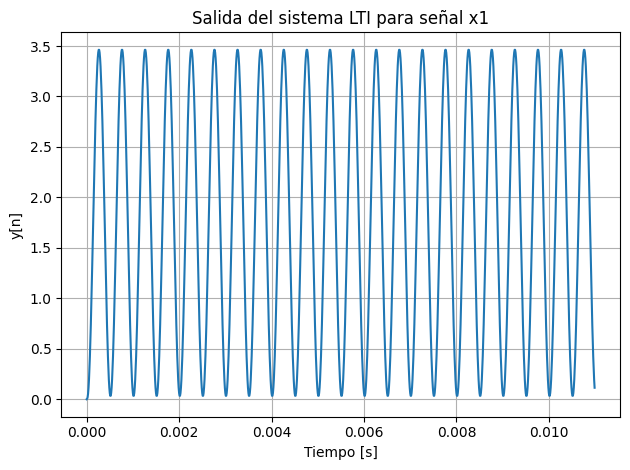

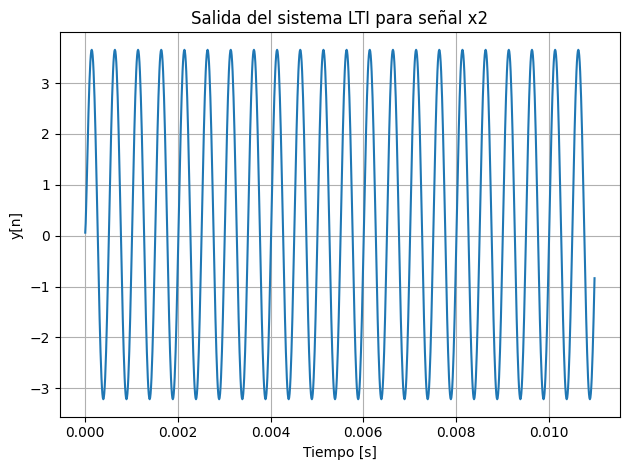

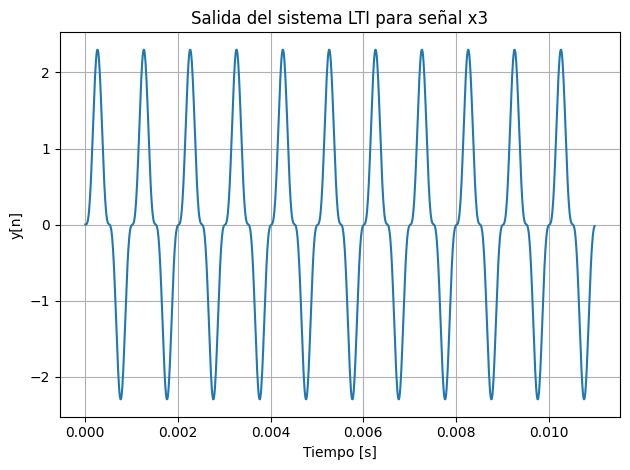

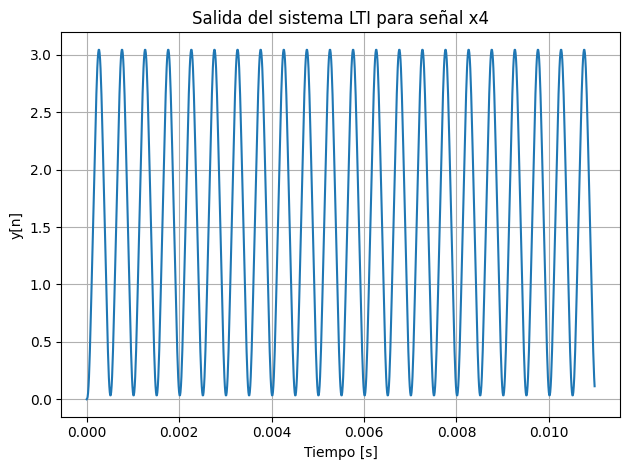

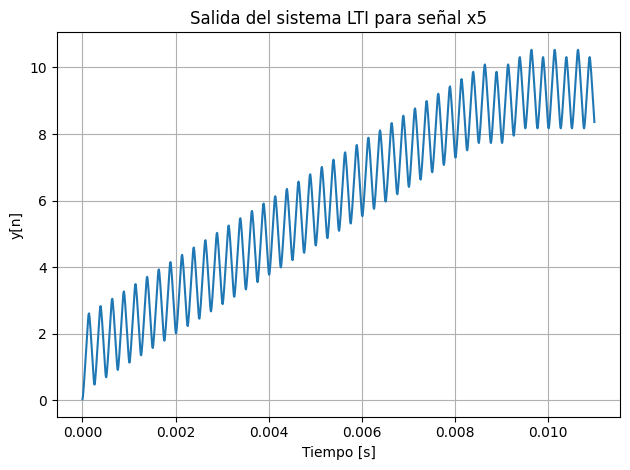

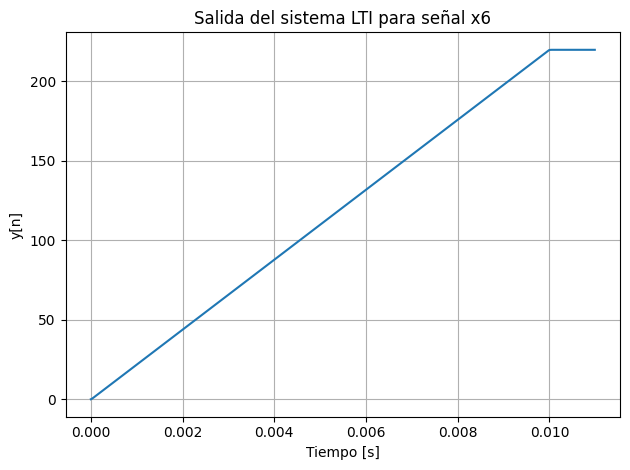

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 31 17:13:20 2025

@author: lucas-douat
"""

import numpy as np
import matplotlib.pyplot as plt
from ts1 import x1,x2,x3,x4,x5,x6
from scipy.signal import lfilter, square

#%%#%% 1) Ecuación en diferencia que modela un sistema LTI:

# Parámetros de simulación
fs = 100000  # frecuencia de muestreo en Hz
ts = 1 / fs  # tiempo entre muestras
N =  1100    # número de muestras
tt = np.linspace(0, (N-1)*ts,N).flatten()


# Coeficientes del sistema LTI
# y[n] = 0.03*x[n] + 0.05*x[n-1] + 0.03*x[n-2] + 1.5*y[n-1] - 0.5*y[n-2]
b = [0.03, 0.05, 0.03]  # coeficientes de entrada (numerador)
a = [1, -1.5, 0.5]      # coeficientes de salida (denominador)

#Aplicar lfilter a cada señal
señales = [x1, x2, x3, x4, x5, x6]
nombres = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']


print("Frecuencia de muestreo:", fs, "Hz")
print("Tiempo de simulación:", round(N * ts, 4), "segundos")


for i, x in enumerate(señales):
    y = lfilter(b, a, x)
    potencia = np.mean(y**2) 
    plt.figure()
    plt.plot(tt, y)
    plt.title(f"Salida del sistema LTI para señal {nombres[i]}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("y[n]")
    plt.grid(True)
    plt.tight_layout()
    print(f"{nombres[i]} | Potencia: {round(potencia, 4)}")


Implementación de un **Algoritmo** para representar mi sistema LTI

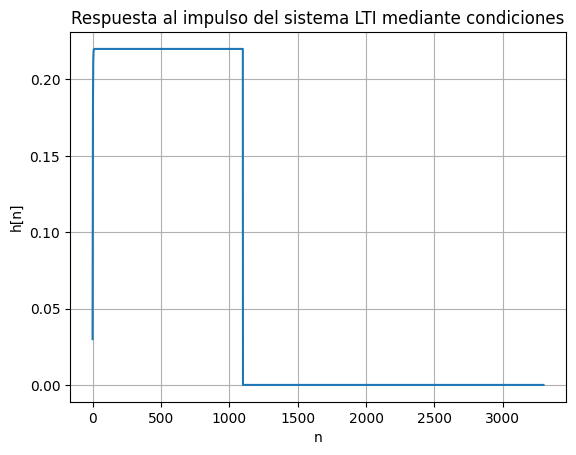

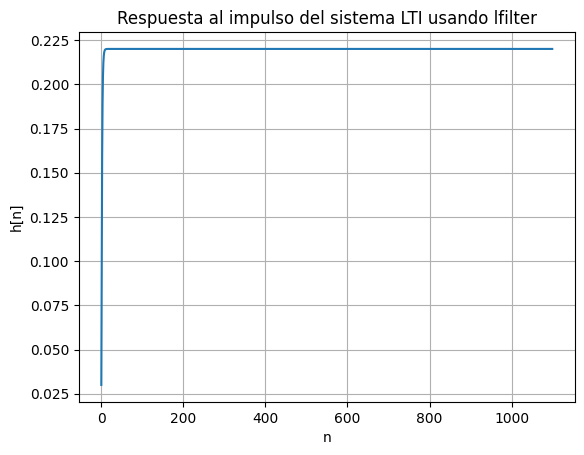

In [10]:
# Sistema LTI  usando condiciones
def sistema_lti(x):
    N = len(x)
    y = np.zeros(2*N+(N-1))
    #y = np.zeros(N)
    
    for n in range(N):
        #Condiciones para acceder a posiciones validas de las listas.
        x_n   = x[n] if n >= 0 else 0
        x_n1  = x[n-1] if n-1 >= 0 else 0
        x_n2  = x[n-2] if n-2 >= 0 else 0
        y_n1  = y[n-1] if n-1 >= 0 else 0
        y_n2  = y[n-2] if n-2 >= 0 else 0
        
        y[n] = 0.03*x_n + 0.05*x_n1 + 0.03*x_n2 + 1.5*y_n1 - 0.5*y_n2
    
    return y

# Impulso Unitaroio
impulso = np.zeros(N)
impulso[0] = 1  # impulso unitario

h1 = sistema_lti(impulso)
tt2 = np.linspace(0, (2*N+(N-1))*ts,2*N+(N-1)).flatten()

# Graficar
plt.plot(range(len(h1)),h1)
plt.title("Respuesta al impulso del sistema LTI mediante condiciones")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)
plt.show()

h2 = lfilter(b,a,impulso)

# Graficar
plt.plot(range(len(h2)),h2)
plt.title("Respuesta al impulso del sistema LTI usando lfilter")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)
plt.show()

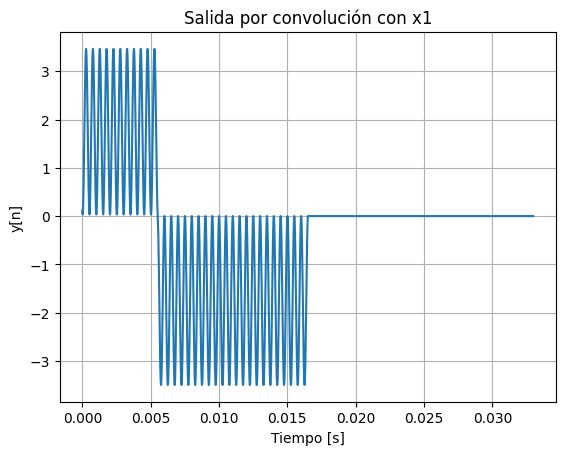

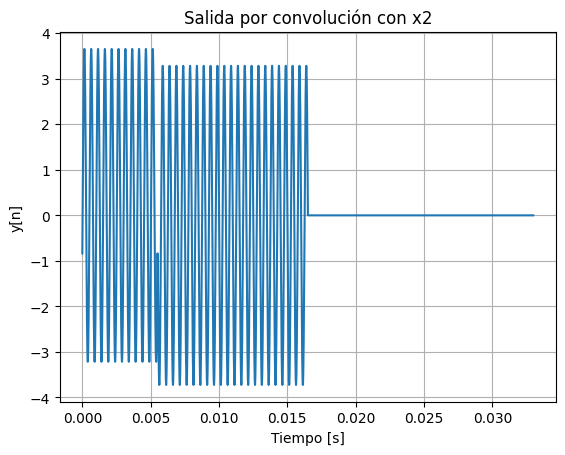

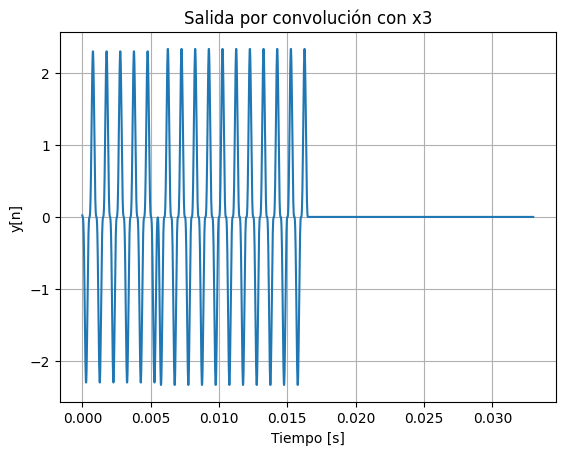

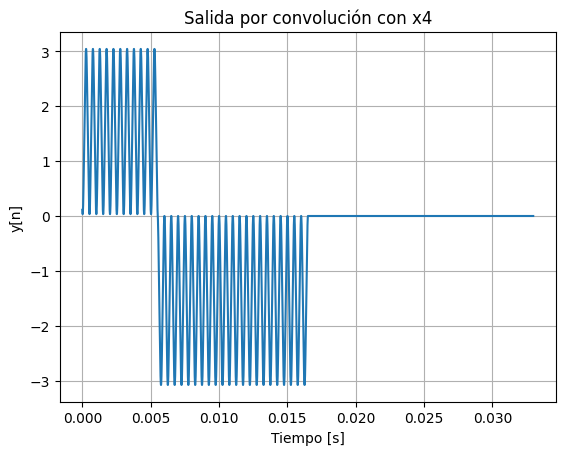

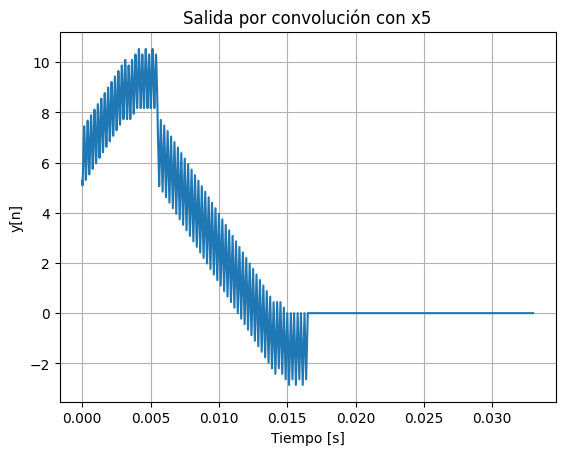

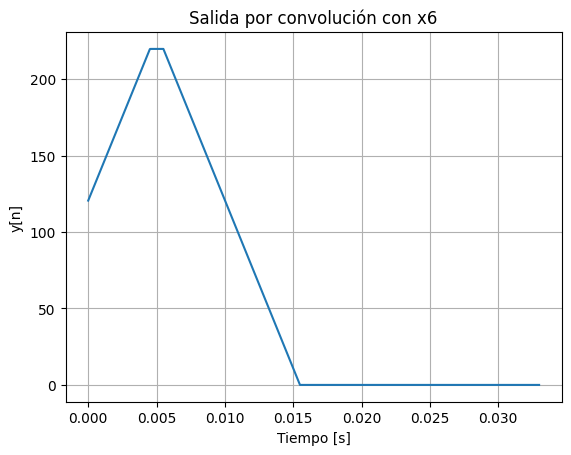

In [11]:
#%% Convolución con señales
señales = [x1, x2, x3, x4, x5, x6]
labels = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

for i, x in enumerate(señales):
    y_conv = np.convolve(x, h1, mode='same')
    plt.figure()
    plt.plot(tt2,y_conv)
    plt.title(f"Salida por convolución con {labels[i]}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("y[n]")
    plt.grid(True)
    plt.show()

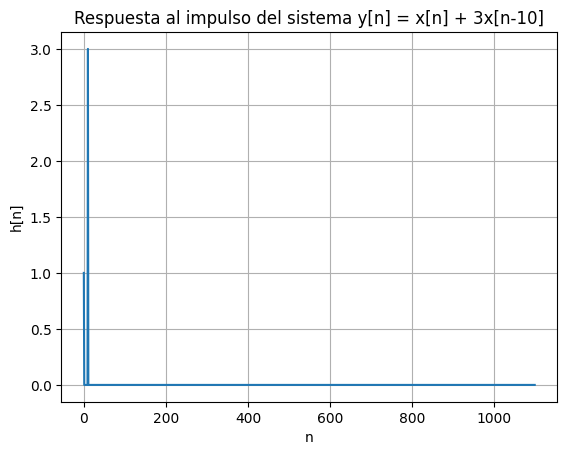

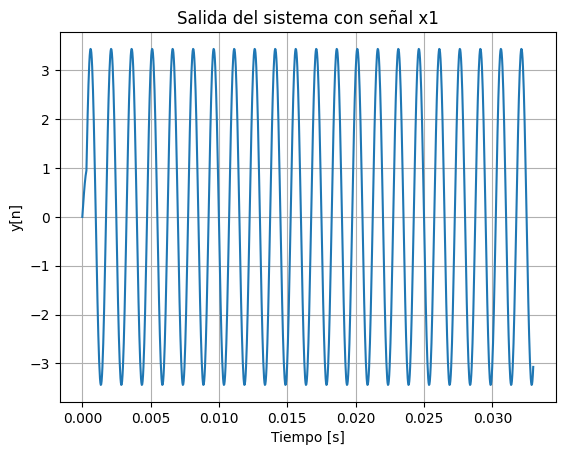

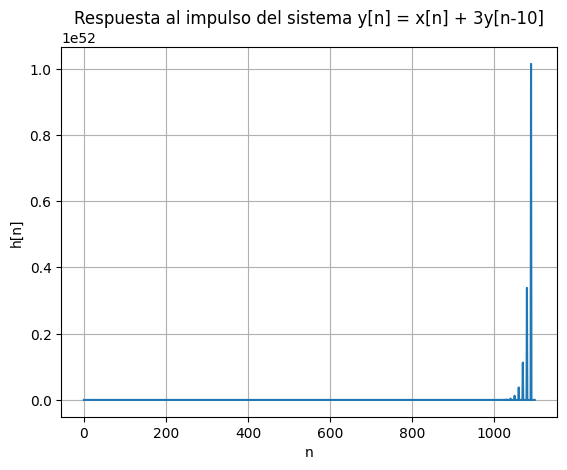

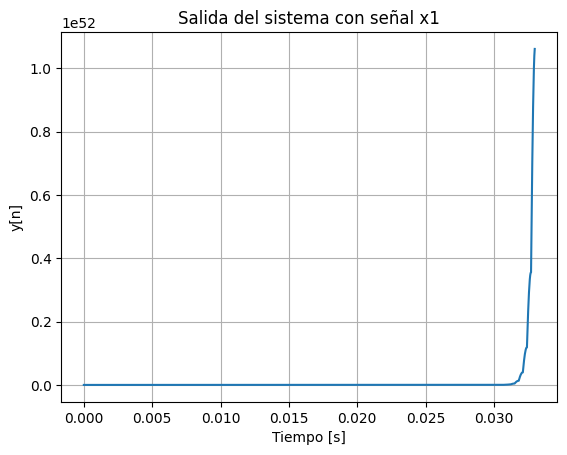

In [13]:
#%% Sistema  y[n] = x[n] + 3x[n-10]
tt = np.linspace(0, (2*N+(N-1))*ts, N).flatten()
b1 = np.zeros(11)
b1[0] = 1
b1[10] = 3
a1 = [1]

h1 = lfilter(b1, a1, impulso)
plt.figure()
plt.plot(h1)
plt.title("Respuesta al impulso del sistema y[n] = x[n] + 3x[n-10]")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)

y1 = lfilter(b1, a1, x1)
plt.figure()
plt.plot(tt, y1)
plt.title("Salida del sistema con señal x1")
plt.xlabel("Tiempo [s]")
plt.ylabel("y[n]")
plt.grid(True)

#%% Sistema: y[n] = x[n] + 3y[n-10]
b2 = [1]
a2 = np.zeros(11)
a2[0] = 1
a2[10] = -3

h2 = lfilter(b2, a2, impulso)
plt.figure()
plt.plot(h2)
plt.title("Respuesta al impulso del sistema y[n] = x[n] + 3y[n-10]")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)

y2 = lfilter(b2, a2, x1)
plt.figure()
plt.plot(tt, y2)
plt.title("Salida del sistema con señal x1")
plt.xlabel("Tiempo [s]")
plt.ylabel("y[n]")
plt.grid(True)

## Importancia de la Cantidad de Muestras en Simulación de Sistemas LTI

La cantidad de muestras `N` influye directamente en la calidad de la simulación:

- **Resolución temporal**: Un `N` mayor permite observar mejor la evolución de señales y respuestas prolongadas.
- **Resolución espectral**: Aumentar `N` mejora la precisión en frecuencia, ya que Δf = fs / N.
- **Evitar truncamiento**: En sistemas recursivos o al aplicar convolución, un `N` pequeño puede cortar la respuesta antes de que se desarrolle completamente.


## Conclusiones

Durante el trabajo implementé un sistema LTI definido por una ecuación en diferencias y lo apliqué a distintas señales de entrada. Esto permitió observar cómo varía la salida según la forma, frecuencia y duración de cada señal.

La comparación entre la **respuesta al impulso obtenida con `lfilter`** y la **implementación manual** mostró diferencias importantes:

- La versión manual mantiene la respuesta constante durante más muestras, lo que puede reflejar una mejor preservación de la dinámica del sistema.
- `lfilter` estabiliza rápidamente la salida, lo que puede deberse a cómo gestiona internamente las condiciones iniciales y la cantidad de muestras disponibles.

Esto sugiere que `lfilter` puede **truncar la respuesta** si no se aplica correctamente el **zero-padding**, lo que afecta la fidelidad de la simulación. Por eso, se recomienda extender las señales para asegurar que la respuesta completa se desarrolle.

En síntesis, el trabajo permitió consolidar conceptos como:
- Modelado de sistemas LTI
- Respuesta al impulso
- Convolución
- Potencia y energía
- Zero-padding
- Comparación entre métodos de simulación

## Autoevaluación del aprendizaje

Durante el desarrollo de este trabajo logré comprender algunos conceptos clave sobre sistemas LTI y su implementación en entornos digitales:

- Comprendí cómo aplicar ecuaciones en diferencias para modelar sistemas LTI, tanto con `scipy.signal.lfilter`, como el razonamiento de implementar un algoritmo que represente mi sistema.  como mediante una función propia que considera condiciones iniciales.
- Aprendí a calcular y graficar la respuesta al impulso entendiendo su rol fundamental en la caracterización de sistemas.
- Incorporé el uso de zero-padding para evitar truncamiento y mejorar la resolución temporal y espectral.

Además, este trabajo me permitió mejorar el manejo de herramientas como **Spyder** y **Jupyter Notebook**, aprendiendo a depurar código, interpretar errores como el desajuste de dimensiones en `matplotlib`, y validar resultados mediante gráficos.

Utilicé Copilot como apoyo para:
- Consultar conceptos teóricos sobre sistemas LTI, convolución y respuesta al impulso.
- Interpretar diferencias entre métodos de simulación de mi sistema LTI con función lfilter vs implementación manual.
- Resolver dudas sobre cómo aplicar padding correctamente y ajustar vectores de tiempo.
- Validar fórmulas matemáticas y estructuras de código en Python.
